In [1]:
# Import libraries need for Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
dt

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
print('The shape of the dataset is', dt.shape)

The shape of the dataset is (7043, 21)


In [5]:
# Dataframe columns
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# To find types of data present in the dataset
dt.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column customerID has ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] unique elements
****************************************************************************************************
This column gender has ['Female' 'Male'] unique elements
****************************************************************************************************
This column SeniorCitizen has [0 1] unique elements
****************************************************************************************************
This column Partner has ['Yes' 'No'] unique elements
****************************************************************************************************
This column Dependents has ['No' 'Yes'] unique elements
****************************************************************************************************
This column tenure has [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 4

In [8]:
# Seeing for the null values in the dataset
dt.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

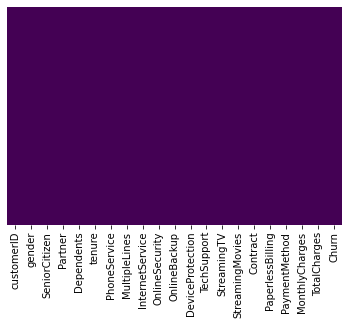

In [9]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [10]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# To find the correlection in the dataset
dt.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

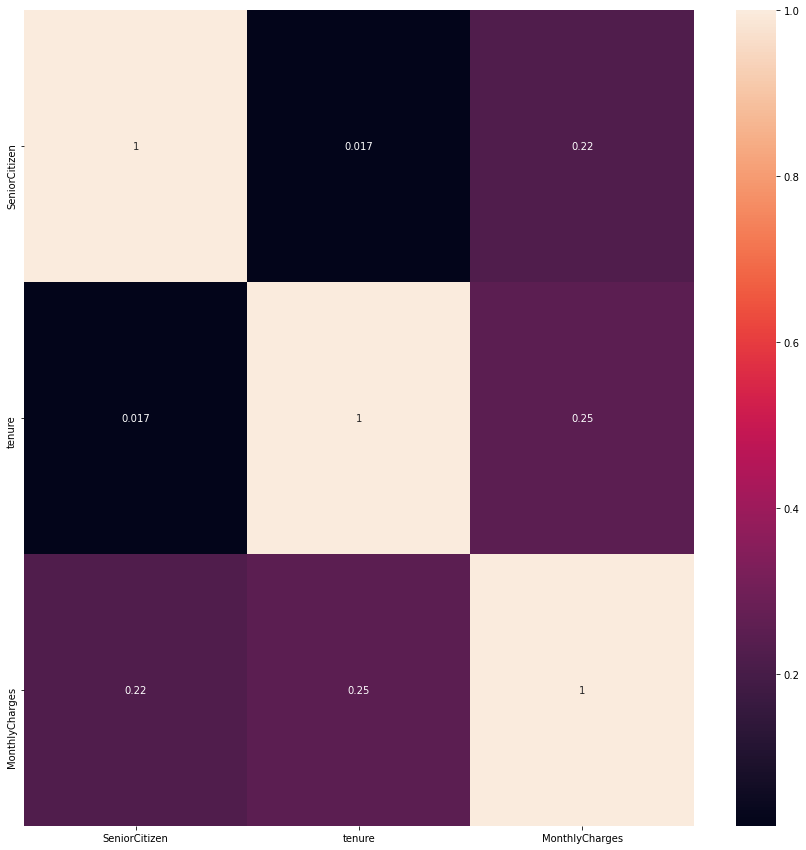

In [12]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

In [13]:
dt.drop_duplicates(keep='first',inplace=True)

In [14]:
# To see the skewness
dt.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [15]:
dt.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


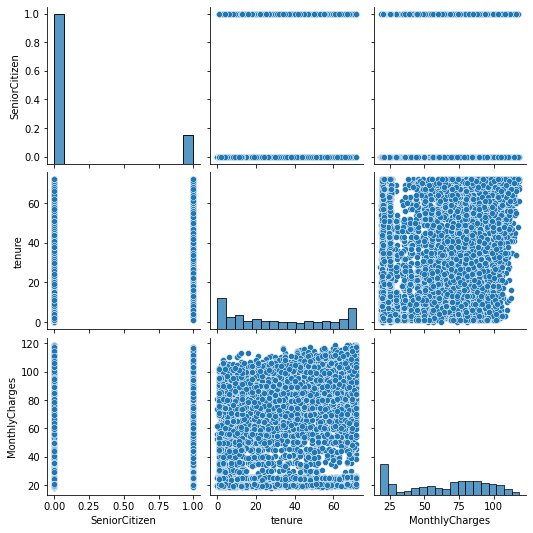

In [74]:
sns.pairplot(dt)

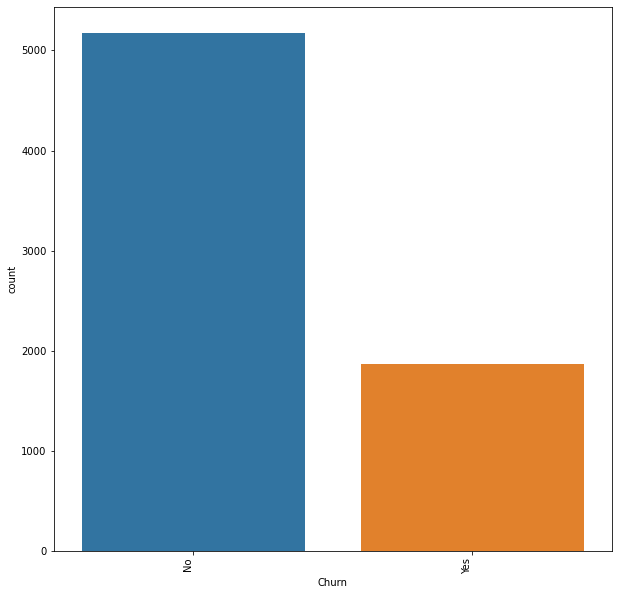

In [17]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Churn'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

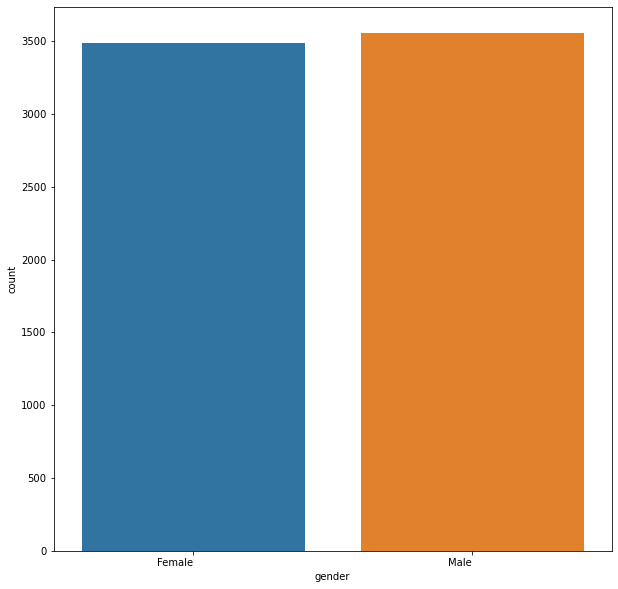

In [21]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['gender'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

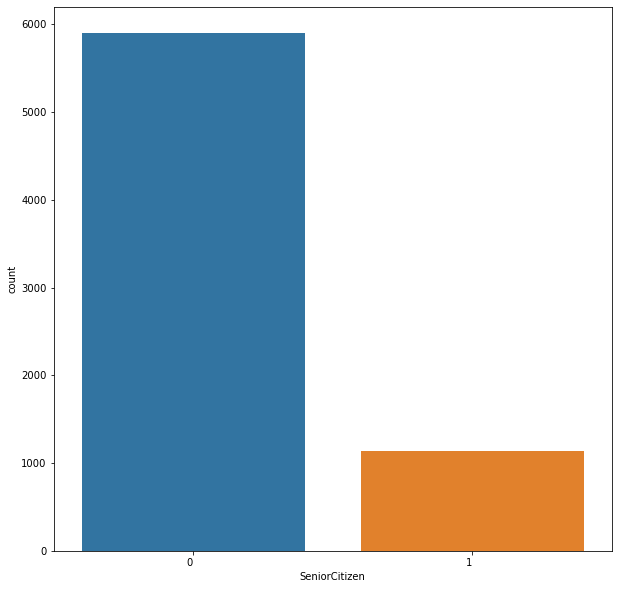

In [20]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['SeniorCitizen'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

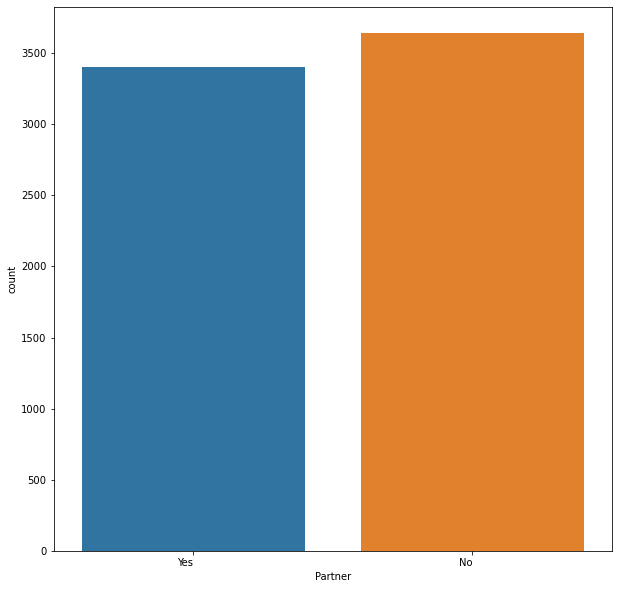

In [23]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Partner'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

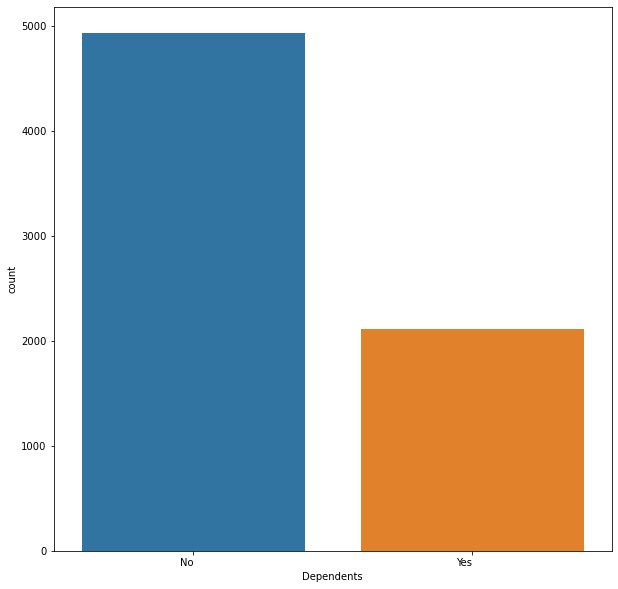

In [24]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Dependents'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

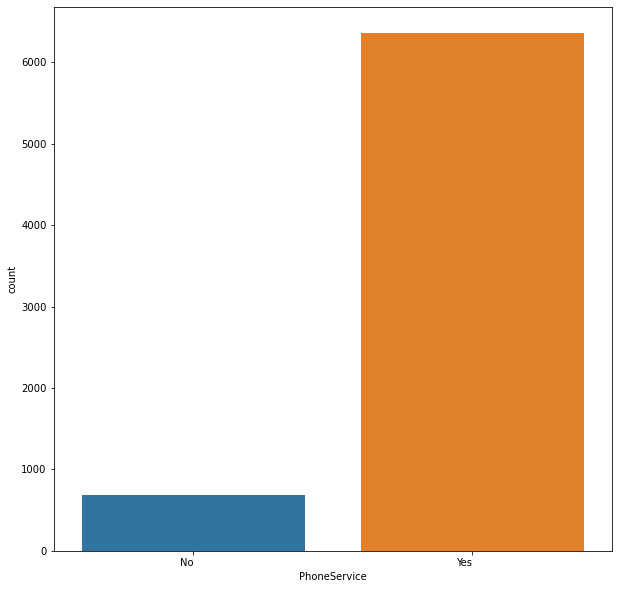

In [25]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['PhoneService'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

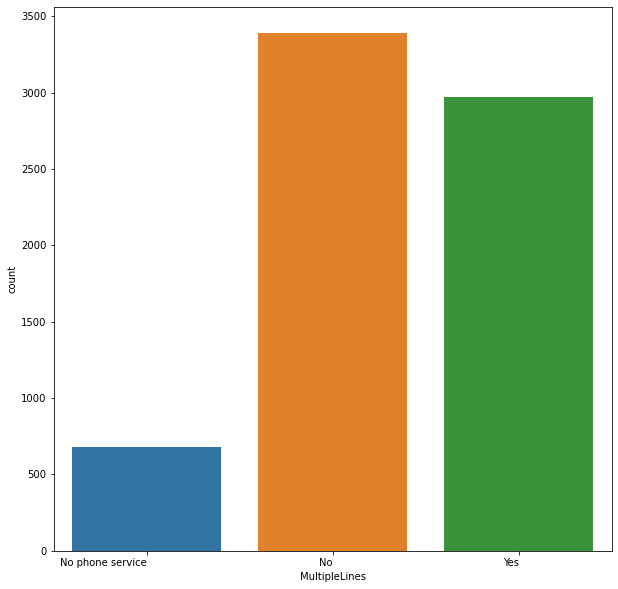

In [26]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['MultipleLines'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

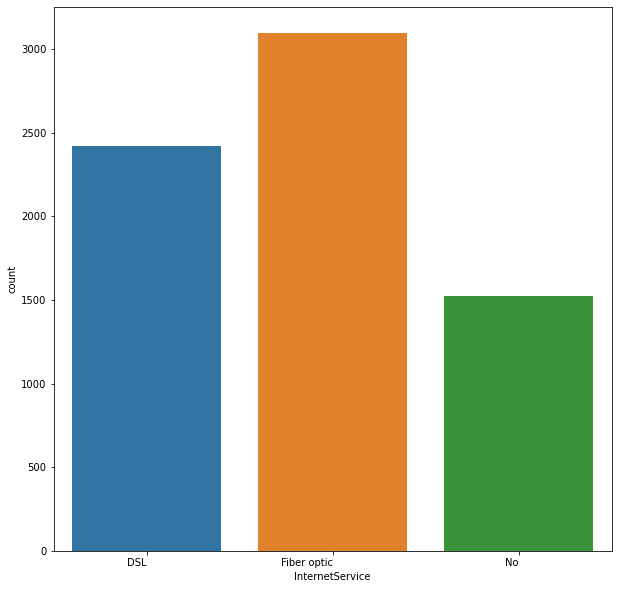

In [27]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['InternetService'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

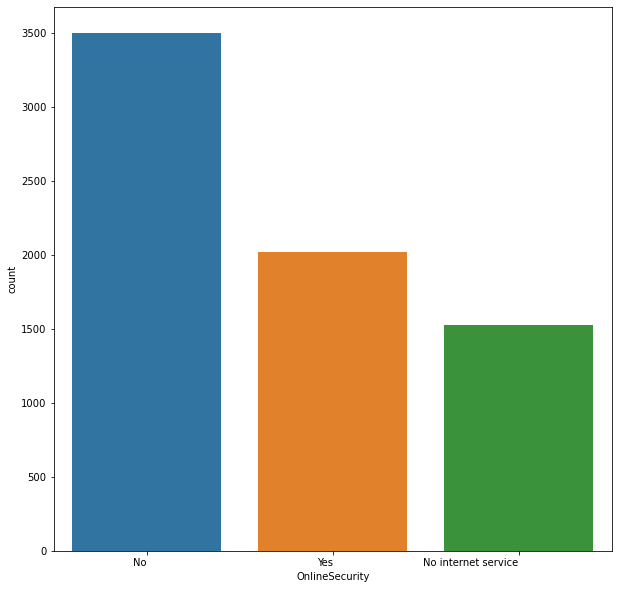

In [28]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['OnlineSecurity'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

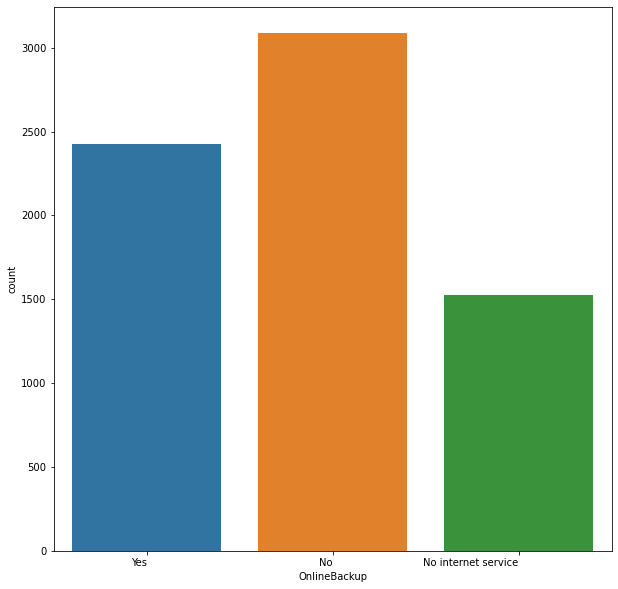

In [29]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['OnlineBackup'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

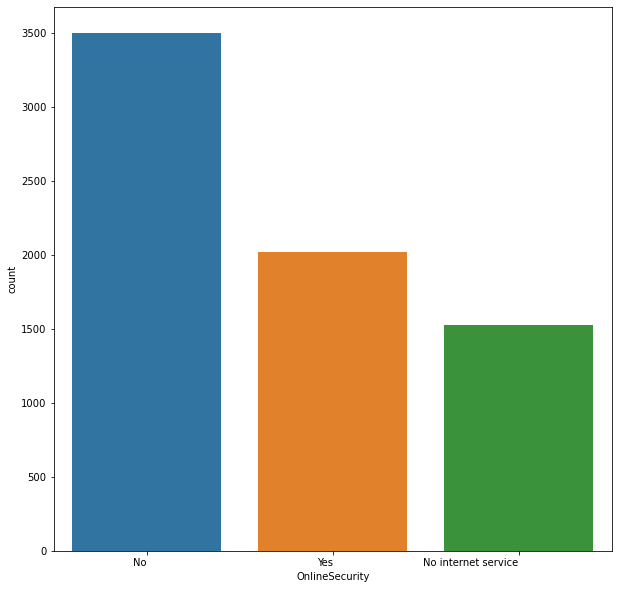

In [30]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['OnlineSecurity'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

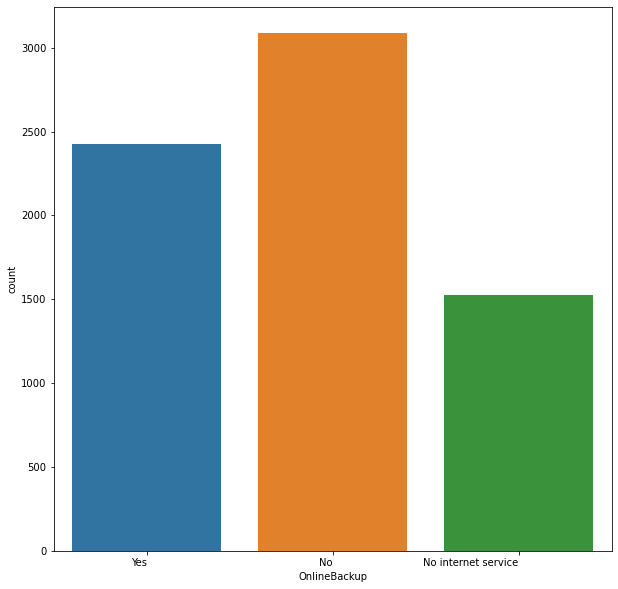

In [31]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['OnlineBackup'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

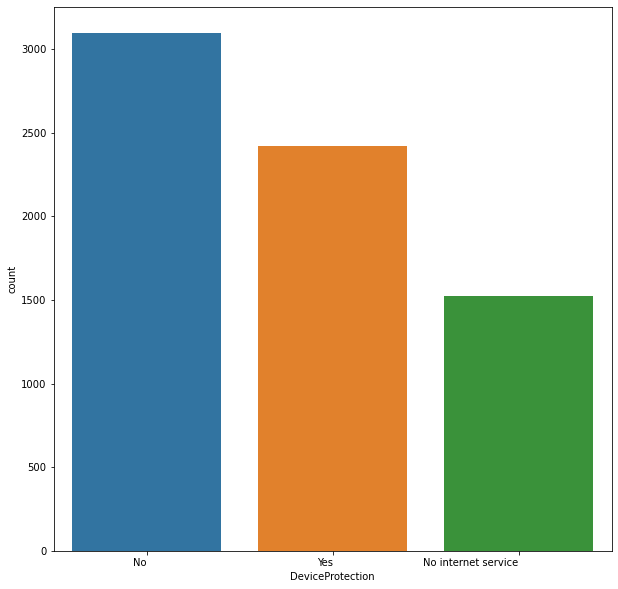

In [32]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['DeviceProtection'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

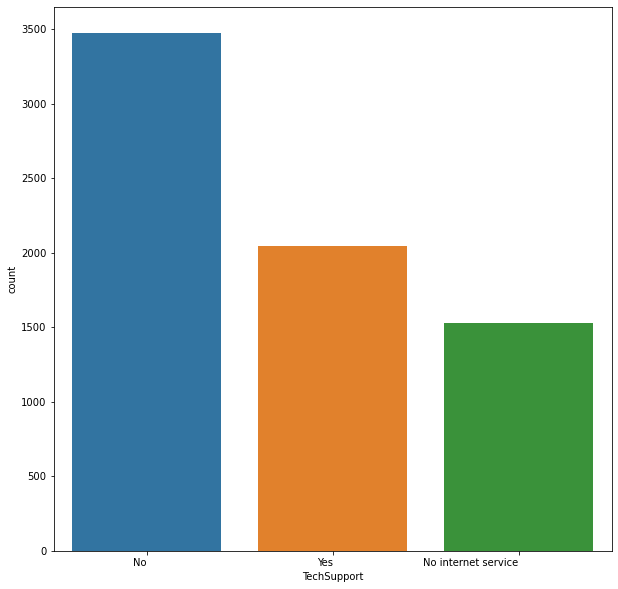

In [33]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['TechSupport'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

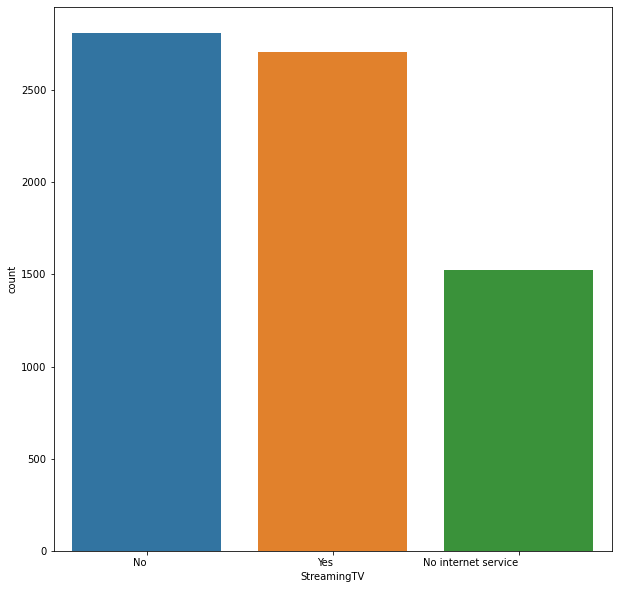

In [34]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['StreamingTV'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

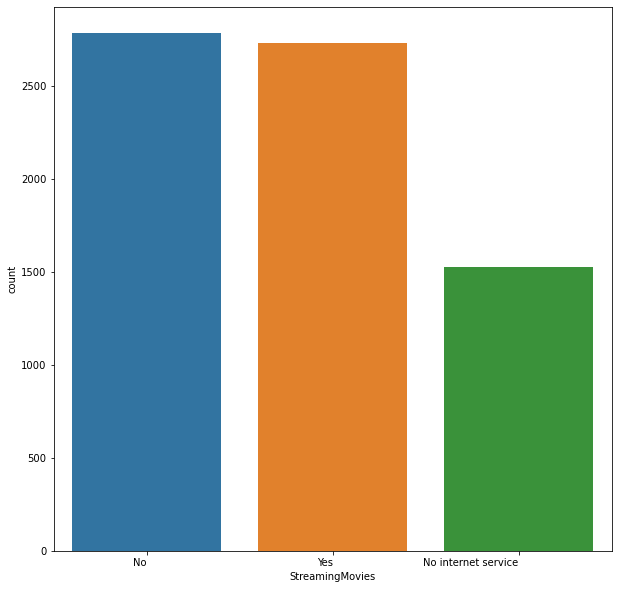

In [35]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['StreamingMovies'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

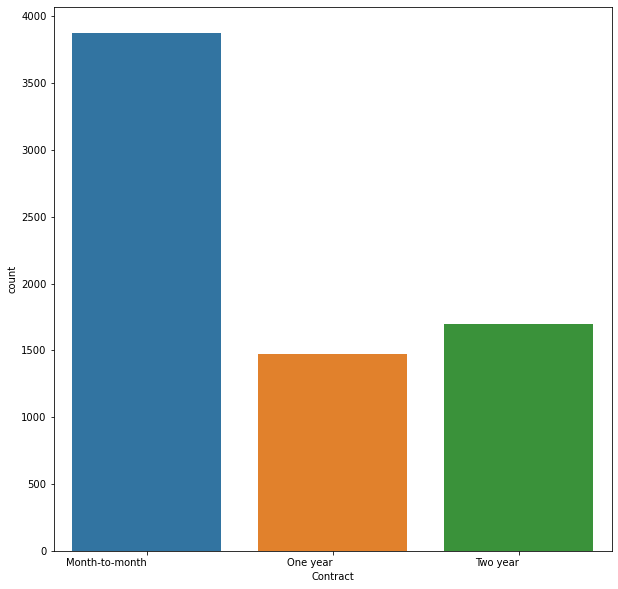

In [36]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Contract'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

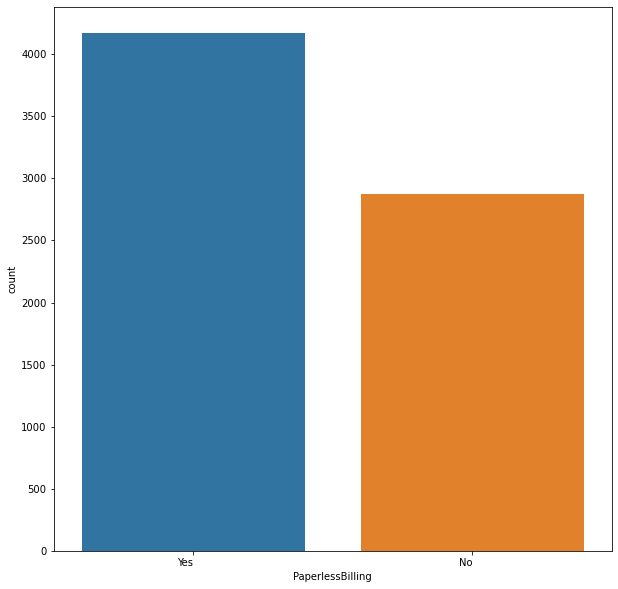

In [37]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['PaperlessBilling'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

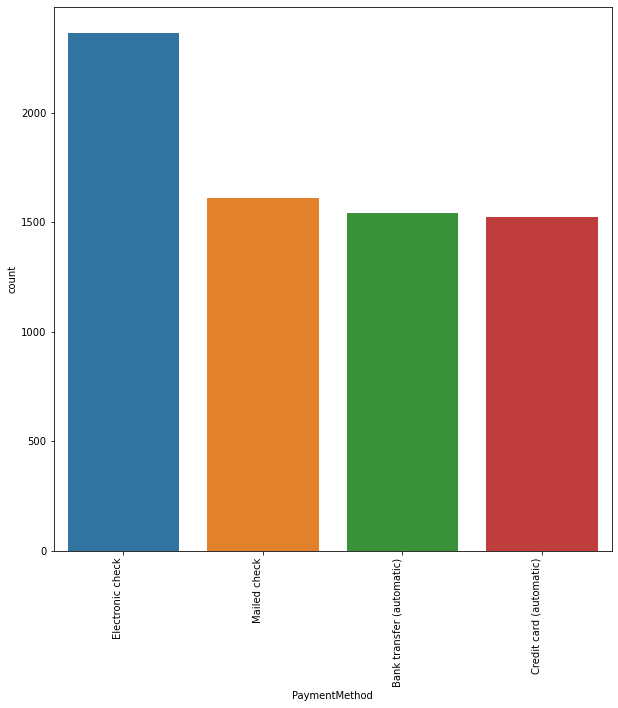

In [39]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['PaymentMethod'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

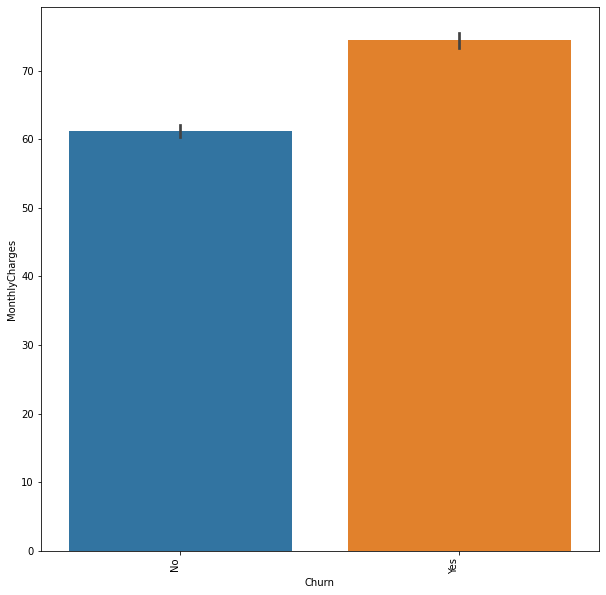

In [68]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Churn',y='MonthlyCharges', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

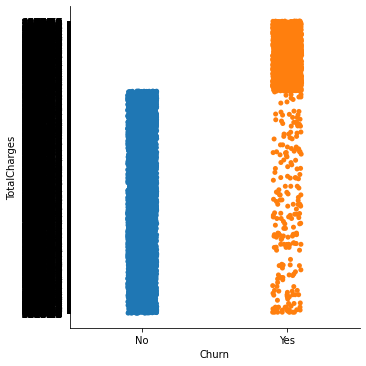

In [76]:
sns.catplot(x='Churn',y='TotalCharges', data=dt)

<AxesSubplot:xlabel='gender'>

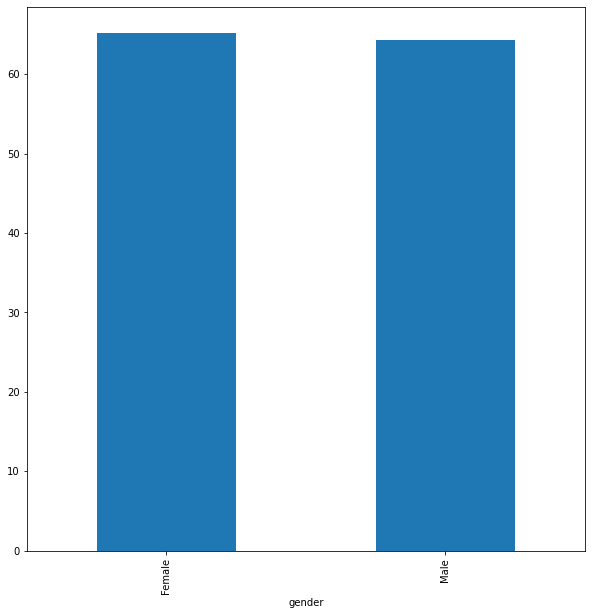

In [108]:
((dt.groupby('gender')['MonthlyCharges'].mean()).sort_values(ascending=False)).plot(kind='bar', figsize=(10,10),fontsize=10)

<AxesSubplot:xlabel='Churn'>

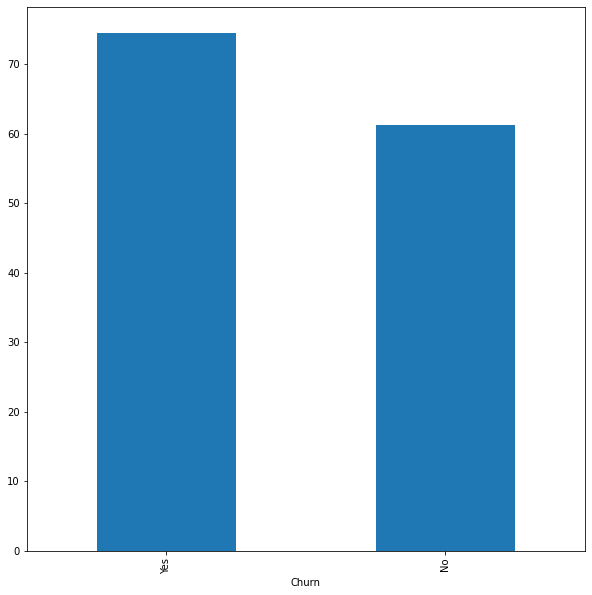

In [113]:
((dt.groupby('Churn')['MonthlyCharges'].mean()).sort_values(ascending=False)).plot(kind='bar', figsize=(10,10),fontsize=10)

<AxesSubplot:xlabel='PaymentMethod'>

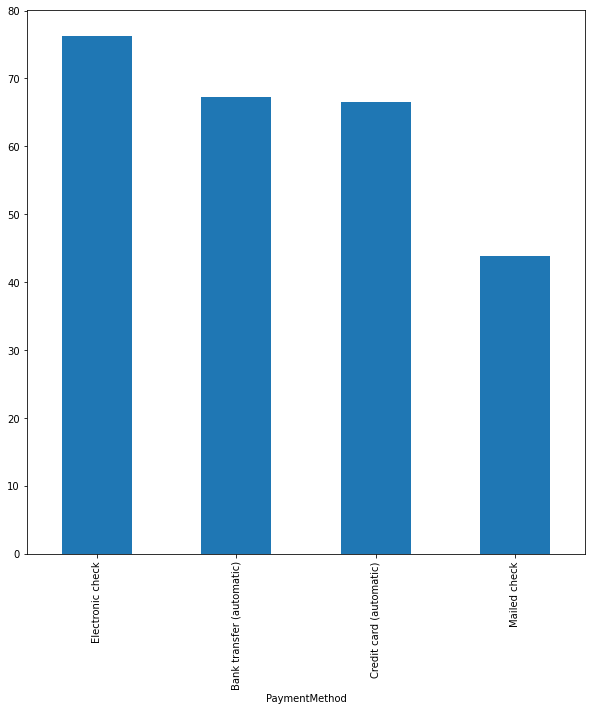

In [112]:
((dt.groupby('PaymentMethod')['MonthlyCharges'].mean()).sort_values(ascending=False)).plot(kind='bar', figsize=(10,10),fontsize=10)

<AxesSubplot:xlabel='SeniorCitizen'>

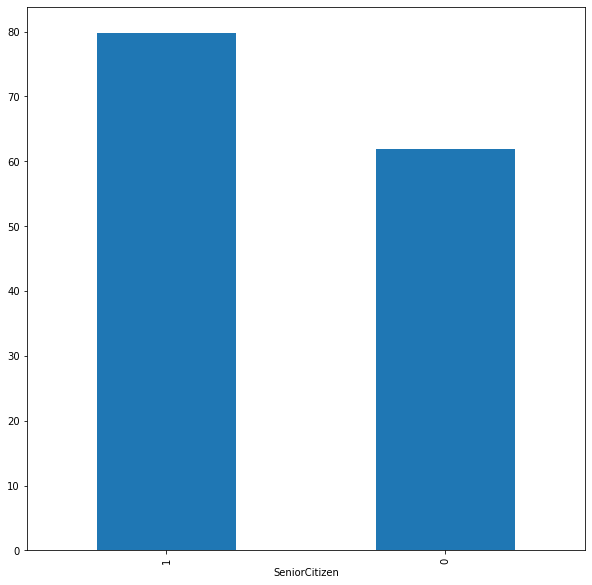

In [110]:
((dt.groupby('SeniorCitizen')['MonthlyCharges'].mean()).sort_values(ascending=False)).plot(kind='bar', figsize=(10,10),fontsize=10)

<AxesSubplot:xlabel='Contract'>

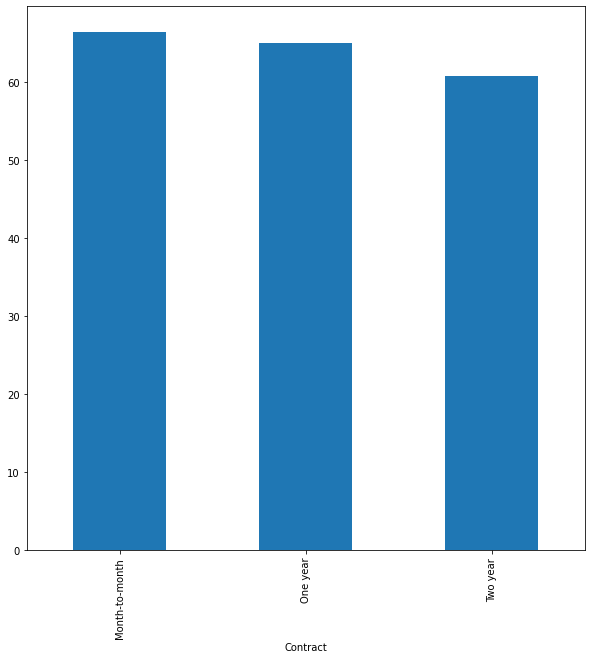

In [114]:
((dt.groupby('Contract')['MonthlyCharges'].mean()).sort_values(ascending=False)).plot(kind='bar', figsize=(10,10),fontsize=10)

<AxesSubplot:ylabel='Density'>

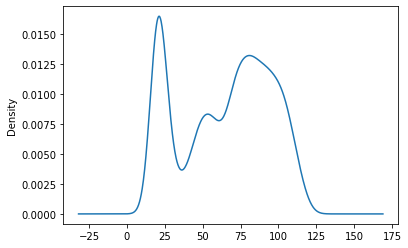

In [116]:
dt['MonthlyCharges'].plot(kind='kde')

In [118]:
dt.drop('customerID', axis=1, inplace=True)

In [119]:
dt

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [121]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [122]:
# Assigning to a variable
le=LabelEncoder()

In [123]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['gender']=le.fit_transform(dt['gender'])
dt['Partner']=le.fit_transform(dt['Partner'])
dt['Dependents']=le.fit_transform(dt['Dependents'])
dt['PhoneService']=le.fit_transform(dt['PhoneService'])
dt['MultipleLines']=le.fit_transform(dt['MultipleLines'])
dt['InternetService']=le.fit_transform(dt['InternetService'])
dt['OnlineSecurity']=le.fit_transform(dt['OnlineSecurity'])
dt['OnlineBackup']=le.fit_transform(dt['OnlineBackup'])
dt['DeviceProtection']=le.fit_transform(dt['DeviceProtection'])
dt['TechSupport']=le.fit_transform(dt['TechSupport'])
dt['StreamingTV']=le.fit_transform(dt['StreamingTV'])
dt['StreamingMovies']=le.fit_transform(dt['StreamingMovies'])
dt['Contract']=le.fit_transform(dt['Contract'])
dt['PaperlessBilling']=le.fit_transform(dt['PaperlessBilling'])
dt['PaymentMethod']=le.fit_transform(dt['PaymentMethod'])
dt['Churn']=le.fit_transform(dt['Churn'])

In [124]:
dt

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


In [140]:
#label encoder
from sklearn.preprocessing import OrdinalEncoder

In [141]:
odr=OrdinalEncoder()

In [142]:
dt['TotalCharges']=odr.fit_transform(dt['TotalCharges'].values.reshape(-1,1))

In [143]:
#Upsmapling have to be performed to remove the biases
from imblearn.over_sampling import SMOTE

In [144]:
osmp=SMOTE(0.75)

In [145]:
# Assignment of X and y
X=dt.drop(['Churn'], axis=1)
y=dt.Churn

In [146]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [147]:
dt.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [148]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [149]:
dt

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505.0,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466.0,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157.0,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400.0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597.0,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698.0,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994.0,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660.0,1


In [150]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y)

In [151]:
X_train_ns,y_train_ns=osmp.fit_resample(x_train,y_train)

In [152]:
# Importing PCA components
from sklearn.decomposition import PCA

In [153]:
pca=PCA()
pca.fit_transform(X_train_ns)

array([[-0.35739606, -1.95744354, -0.75155533, ...,  0.16880242,
         0.33005964,  0.18413536],
       [-2.50759551,  0.63812198,  0.54701951, ...,  1.54060811,
        -0.0359017 , -0.70682981],
       [-1.57598369,  1.15879216, -1.72944194, ..., -0.52046858,
         0.1540758 , -0.32674227],
       ...,
       [-1.84801705, -2.16795531, -0.9160443 , ...,  0.64753189,
         0.07086984,  0.24049292],
       [-1.20398774,  2.05265751, -1.77362489, ...,  0.75004829,
        -0.13746849, -0.30138366],
       [-2.86645633, -1.34666658, -0.22633869, ...,  0.54537244,
        -0.03390847,  0.38999292]])

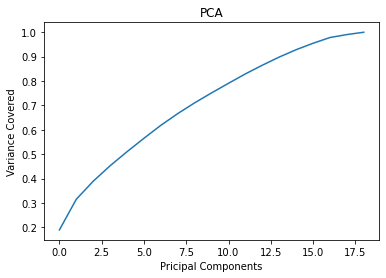

In [154]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [156]:
pca=PCA(n_components=17)
new_pcomp=pca.fit_transform(X_train_ns)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                          'PC11','PC12','PC13','PC14','PC15','PC16','PC17'])

In [157]:
prin_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.357396,-1.957444,-0.751555,0.631394,0.855977,0.577856,0.485635,-2.378599,1.252278,0.196190,-0.530042,0.938480,0.354950,0.095549,0.009816,-0.040566,0.168802
1,-2.507596,0.638122,0.547020,-1.081201,0.169099,-1.144440,-1.481436,0.207456,0.075374,-0.400720,0.435424,-0.060332,-0.324857,0.017350,-0.043772,0.054681,1.540608
2,-1.575984,1.158792,-1.729442,1.099043,0.516922,0.428528,1.013722,-0.607078,0.673484,0.123239,1.002988,0.354018,-0.915791,-0.934671,-0.114840,-0.613432,-0.520469
3,-0.911839,1.026695,1.210642,0.384905,-0.923656,0.157294,0.613209,-1.963559,-2.031757,0.926954,-0.619037,-0.339239,-0.223411,2.106893,0.054872,-0.050633,0.157343
4,1.048453,-0.662963,0.410582,-0.705996,-2.105244,1.093208,0.449349,1.498530,1.136342,0.813743,0.206909,-1.836106,-0.073122,2.068705,-0.051832,-0.436412,-0.932194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,2.866747,-1.594445,-0.377102,1.191762,-0.944126,-0.249556,-0.904223,-0.605308,0.392741,-0.695268,-0.586554,-0.434308,0.226828,-1.326530,0.220819,0.277163,0.851919
6822,-2.825868,-1.081691,0.791089,-0.412912,-1.015597,-0.886907,1.490904,1.595786,-0.430344,-0.475454,0.680415,0.378281,-0.419709,0.182048,-0.032047,0.392346,0.758638
6823,-1.848017,-2.167955,-0.916044,0.206215,0.471705,0.345835,1.209646,0.857671,-0.593570,-0.253160,0.849790,1.321720,0.172160,0.211671,0.577961,0.132595,0.647532
6824,-1.203988,2.052658,-1.773625,0.086256,1.215708,0.298671,0.858317,-0.279794,0.803942,0.300223,0.671956,0.329366,-0.331606,-0.462824,-0.163099,-1.374200,0.750048


In [158]:
# Importing machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [159]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7730600292825769 random_state 1
accuracy of the optimum model 0.7730600292825769 random_state 1
accuracy of the model 0.7474377745241582 random_state 2
accuracy of the model 0.7657393850658858 random_state 3
accuracy of the model 0.7628111273792094 random_state 4
accuracy of the model 0.7569546120058566 random_state 5
accuracy of the model 0.7554904831625183 random_state 6
accuracy of the model 0.7562225475841874 random_state 7
accuracy of the model 0.7459736456808199 random_state 8
accuracy of the model 0.7745241581259151 random_state 9
accuracy of the optimum model 0.7745241581259151 random_state 9
accuracy of the model 0.760614934114202 random_state 10
accuracy of the model 0.7598828696925329 random_state 11
accuracy of the model 0.7489019033674963 random_state 12
accuracy of the model 0.7525622254758418 random_state 13
accuracy of the model 0.7525622254758418 random_state 14
accuracy of the model 0.7510980966325037 random_state 15
accuracy of the model 0.753

In [160]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.7920937042459737 in random state 616


In [161]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,500):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train, y_train)
    pred=kn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.753294289897511 random_state 1
accuracy of the optimum model 0.753294289897511 random_state 1
accuracy of the model 0.7818448023426061 random_state 2
accuracy of the optimum model 0.7818448023426061 random_state 2
accuracy of the model 0.781112737920937 random_state 3
accuracy of the model 0.7906295754026355 random_state 4
accuracy of the optimum model 0.7906295754026355 random_state 4
accuracy of the model 0.7642752562225475 random_state 5
accuracy of the model 0.7569546120058566 random_state 6
accuracy of the model 0.7847730600292826 random_state 7
accuracy of the model 0.7693997071742313 random_state 8
accuracy of the model 0.7730600292825769 random_state 9
accuracy of the model 0.7789165446559297 random_state 10
accuracy of the model 0.7715959004392386 random_state 11
accuracy of the model 0.7723279648609077 random_state 12
accuracy of the model 0.7679355783308931 random_state 13
accuracy of the model 0.7635431918008785 random_state 14
accuracy of the model 

In [162]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8045387994143485 in random state 371


In [163]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,1000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    de=DecisionTreeClassifier()
    de.fit(x_train, y_train)
    pred=de.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7459736456808199 random_state 1
accuracy of the optimum model 0.7459736456808199 random_state 1
accuracy of the model 0.7540263543191801 random_state 2
accuracy of the optimum model 0.7540263543191801 random_state 2
accuracy of the model 0.7576866764275256 random_state 3
accuracy of the optimum model 0.7576866764275256 random_state 3
accuracy of the model 0.7481698389458272 random_state 4
accuracy of the model 0.7452415812591509 random_state 5
accuracy of the model 0.7401171303074671 random_state 6
accuracy of the model 0.7371888726207906 random_state 7
accuracy of the model 0.753294289897511 random_state 8
accuracy of the model 0.7569546120058566 random_state 9
accuracy of the model 0.7437774524158126 random_state 10
accuracy of the model 0.7576866764275256 random_state 11
accuracy of the model 0.7313323572474377 random_state 12
accuracy of the model 0.739385065885798 random_state 13
accuracy of the model 0.7525622254758418 random_state 14
accuracy of the model

In [164]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.7796486090775988 in random state 340


In [165]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,1000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    xe=XGBRFClassifier()
    xe.fit(x_train, y_train)
    pred=xe.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

[13:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7715959004392386 random_state 1
accuracy of the optimum model 0.7715959004392386 random_state 1
[13:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7628111273792094 random_state 2
[13:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

In [166]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8118594436310396 in random state 616


In [167]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    ad=AdaBoostClassifier()
    ad.fit(x_train, y_train)
    pred=ad.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7510980966325037 random_state 1
accuracy of the optimum model 0.7510980966325037 random_state 1
accuracy of the model 0.7525622254758418 random_state 2
accuracy of the optimum model 0.7525622254758418 random_state 2
accuracy of the model 0.7613469985358712 random_state 3
accuracy of the optimum model 0.7613469985358712 random_state 3
accuracy of the model 0.7650073206442167 random_state 4
accuracy of the optimum model 0.7650073206442167 random_state 4
accuracy of the model 0.753294289897511 random_state 5
accuracy of the model 0.7584187408491947 random_state 6
accuracy of the model 0.7547584187408491 random_state 7
accuracy of the model 0.7481698389458272 random_state 8
accuracy of the model 0.7723279648609077 random_state 9
accuracy of the optimum model 0.7723279648609077 random_state 9
accuracy of the model 0.7635431918008785 random_state 10
accuracy of the model 0.7584187408491947 random_state 11
accuracy of the model 0.7598828696925329 random_state 12
accura

In [168]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.7920937042459737 in random state 143


In [169]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    gc=GradientBoostingClassifier()
    gc.fit(x_train, y_train)
    pred=gc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7745241581259151 random_state 1
accuracy of the optimum model 0.7745241581259151 random_state 1
accuracy of the model 0.7591508052708639 random_state 2
accuracy of the model 0.7715959004392386 random_state 3
accuracy of the model 0.7818448023426061 random_state 4
accuracy of the optimum model 0.7818448023426061 random_state 4
accuracy of the model 0.7693997071742313 random_state 5
accuracy of the model 0.7774524158125915 random_state 6
accuracy of the model 0.7708638360175696 random_state 7
accuracy of the model 0.7701317715959004 random_state 8
accuracy of the model 0.7825768667642753 random_state 9
accuracy of the optimum model 0.7825768667642753 random_state 9
accuracy of the model 0.7767203513909224 random_state 10
accuracy of the model 0.7745241581259151 random_state 11
accuracy of the model 0.7679355783308931 random_state 12
accuracy of the model 0.7796486090775988 random_state 13
accuracy of the model 0.767203513909224 random_state 14
accuracy of the mode

In [170]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8118594436310396 in random state 616


In [171]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    sc=SVC()
    sc.fit(x_train, y_train)
    pred=sc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7869692532942899 random_state 1
accuracy of the optimum model 0.7869692532942899 random_state 1
accuracy of the model 0.7730600292825769 random_state 2
accuracy of the model 0.7789165446559297 random_state 3
accuracy of the model 0.8067349926793558 random_state 4
accuracy of the optimum model 0.8067349926793558 random_state 4
accuracy of the model 0.781112737920937 random_state 5
accuracy of the model 0.7847730600292826 random_state 6
accuracy of the model 0.787701317715959 random_state 7
accuracy of the model 0.7825768667642753 random_state 8
accuracy of the model 0.7928257686676428 random_state 9
accuracy of the model 0.7855051244509517 random_state 10
accuracy of the model 0.7884333821376281 random_state 11
accuracy of the model 0.7796486090775988 random_state 12
accuracy of the model 0.7796486090775988 random_state 13
accuracy of the model 0.7745241581259151 random_state 14
accuracy of the model 0.7745241581259151 random_state 15
accuracy of the model 0.7862

In [172]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8265007320644217 in random state 616


In [173]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=616)
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred1=lr.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('accuracy of the model', acc,'random_state', 616)
print(classification_report(y_test,pred1))

accuracy of the model 0.7920937042459737 random_state 616
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       802
           1       0.72      0.80      0.76       564

    accuracy                           0.79      1366
   macro avg       0.79      0.79      0.79      1366
weighted avg       0.80      0.79      0.79      1366



In [174]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=371)
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
pred2=kn.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('accuracy of the model', acc,'random_state', 371)
print(classification_report(y_test,pred2))

accuracy of the model 0.8045387994143485 random_state 371
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       749
           1       0.74      0.87      0.80       617

    accuracy                           0.80      1366
   macro avg       0.81      0.81      0.80      1366
weighted avg       0.81      0.80      0.80      1366



In [175]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=340)
de=DecisionTreeClassifier()
de.fit(x_train, y_train)
pred3=de.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('accuracy of the model', acc,'random_state', 340)
print(classification_report(y_test,pred3))

accuracy of the model 0.7628111273792094 random_state 340
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       795
           1       0.71      0.72      0.72       571

    accuracy                           0.76      1366
   macro avg       0.76      0.76      0.76      1366
weighted avg       0.76      0.76      0.76      1366



In [176]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=616)
xe=XGBRFClassifier()
xe.fit(x_train, y_train)
pred4=xe.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('accuracy of the model', acc,'random_state', 616)
print(classification_report(y_test,pred4))

[16:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.8118594436310396 random_state 616
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       802
           1       0.75      0.81      0.78       564

    accuracy                           0.81      1366
   macro avg       0.81      0.81      0.81      1366
weighted avg       0.82      0.81      0.81      1366



In [177]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=143)
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
pred5=ad.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('accuracy of the model', acc,'random_state', 143)
print(classification_report(y_test,pred5))

accuracy of the model 0.7920937042459737 random_state 143
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       789
           1       0.75      0.76      0.76       577

    accuracy                           0.79      1366
   macro avg       0.79      0.79      0.79      1366
weighted avg       0.79      0.79      0.79      1366



In [179]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=616)
gc=GradientBoostingClassifier()
gc.fit(x_train, y_train)
pred6=gc.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('accuracy of the model', acc,'random_state', 616)
print(classification_report(y_test,pred6))

accuracy of the model 0.8177159590043924 random_state 616
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       802
           1       0.76      0.81      0.79       564

    accuracy                           0.82      1366
   macro avg       0.81      0.82      0.81      1366
weighted avg       0.82      0.82      0.82      1366



In [180]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=616)
sc=SVC()
sc.fit(x_train, y_train)
pred7=sc.predict(x_test)
acc=accuracy_score(y_test,pred7)
print('accuracy of the model', acc,'random_state', 616)
print(classification_report(y_test,pred7))

accuracy of the model 0.8265007320644217 random_state 616
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       802
           1       0.77      0.82      0.80       564

    accuracy                           0.83      1366
   macro avg       0.82      0.83      0.82      1366
weighted avg       0.83      0.83      0.83      1366



In [181]:
#Ploting ROC and AUC curves
from sklearn.metrics import roc_curve,auc
fpr1,tpr1,thresholds=roc_curve(y_test,pred1)
roc_auc1=auc(fpr1,tpr1)
fpr2,tpr2,thresholds=roc_curve(y_test,pred2)
roc_auc2=auc(fpr2,tpr2)
fpr3,tpr3,thresholds=roc_curve(y_test,pred3)
roc_auc3=auc(fpr3,tpr3)
fpr4,tpr4,thresholds=roc_curve(y_test,pred4)
roc_auc4=auc(fpr4,tpr4)
fpr5,tpr5,thresholds=roc_curve(y_test,pred5)
roc_auc5=auc(fpr5,tpr5)
fpr6,tpr6,thresholds=roc_curve(y_test,pred6)
roc_auc6=auc(fpr6,tpr6)
fpr7,tpr7,thresholds=roc_curve(y_test,pred7)
roc_auc7=auc(fpr7,tpr7)

In [182]:
print(roc_auc1,
      roc_auc2,
      roc_auc3,
      roc_auc4,
      roc_auc5,
      roc_auc6,
      roc_auc7)

0.7940034665110275 0.5058851099202348 0.5283356325498311 0.8118887179215083 0.5266311172423551 0.8160869988150192 0.8251467961302418


In [183]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [3, 2,1, 0.1, 0.01],
              'kernel': ['rbf']}

In [184]:
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(SVC(),param_grid=params)
g.fit(x_train,y_train)
print('The best parameters are ', g.best_params_)

The best parameters are  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [185]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=616)
sc=SVC(C=10, gamma=1, kernel='rbf')
sc.fit(x_train, y_train)
pred7=sc.predict(x_test)
acc=accuracy_score(y_test,pred7)
print('accuracy of the model', acc,'random_state', 616)
print(classification_report(y_test,pred7))

accuracy of the model 0.8594436310395315 random_state 616
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       802
           1       0.88      0.77      0.82       564

    accuracy                           0.86      1366
   macro avg       0.86      0.85      0.85      1366
weighted avg       0.86      0.86      0.86      1366



In [ ]:
#pickling
import pickle
filename = 'Cca'
outfile = open(filename,'Cca')
pickle.dump(Cca_dict,outfile)
outfile.close()

# Conclusion
The customer churn data set is imported and analyzed by doing EDA. The label encoding technique is used. As the output have to be balanced SMOTE is used inder to avoid bias in the dataset. SVC model gave the highest accuracy. The accuracy of the model 0.8594436310395315 random_state 616.